In [27]:
#Biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

#Zmienienie formatu zapisu danych numerycznych na dwie cyfry po przecinku.
pd.options.display.float_format = '{:.2f}'.format

#Wczytanie danych
df = pd.read_csv('insurance.csv')

# Podgląd danych

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.duplicated().sum()

1

In [17]:
df.shape

(1338, 7)

In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Obróbka danych

In [28]:
smoke = {'yes': 1,'no': 0}

df.smoker = [smoke[x] for x in df.smoker]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.77,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.88,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,0,northwest,10600.55
1334,18,female,31.92,0,0,northeast,2205.98
1335,18,female,36.85,0,0,southeast,1629.83
1336,21,female,25.80,0,0,southwest,2007.94


In [32]:
regions = df.region.unique()
regions


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Macierz korelacji

In [49]:
corr = df.corr(numeric_only = True)
corr

,age,bmi,children,smoker,charges
age,1.00,0.11,0.04,-0.03,0.30
bmi,0.11,1.00,0.01,0.00,0.20
children,0.04,0.01,1.00,0.01,0.07
smoker,-0.03,0.00,0.01,1.00,0.79
charges,0.30,0.20,0.07,0.79,1.00


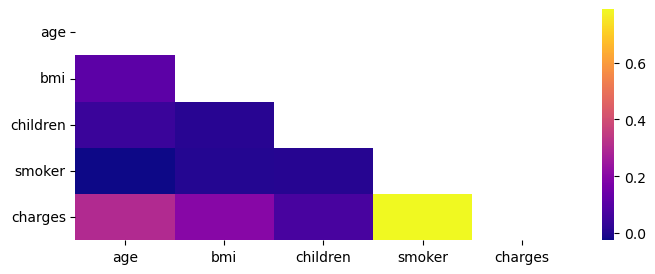

In [46]:
f, ax = plt.subplots(figsize=(8, 3))
sns.heatmap(corr, mask=np.triu(corr), cmap = 'plasma', ax=ax, )
plt.show()

# Rozkład danych

<Axes: ylabel='Frequency'>

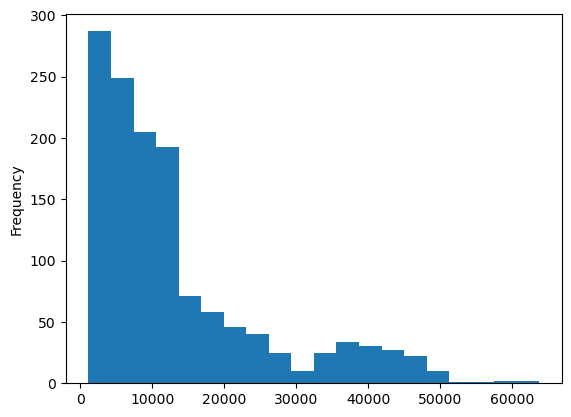

In [55]:
df.charges.plot.hist(bins = 20)

<Axes: ylabel='Frequency'>

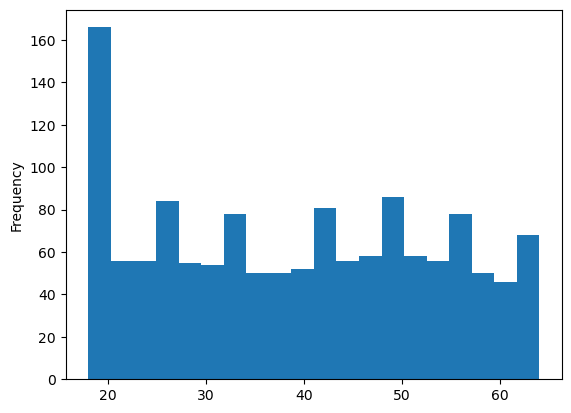

In [56]:
df.age.plot.hist(bins = 20)

<Axes: ylabel='Frequency'>

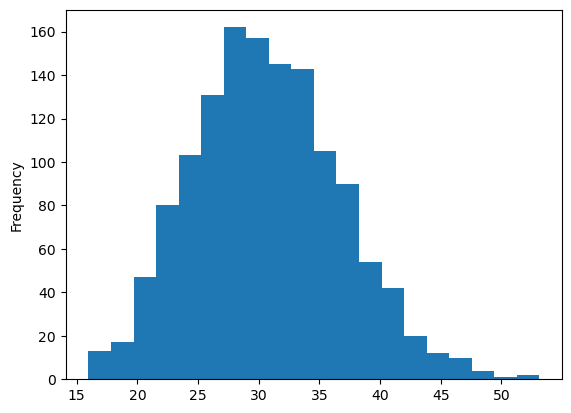

In [57]:
df.bmi.plot.hist(bins = 20)